# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/tunguz/200000-jeopardy-questions

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [119]:
# import necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# created dataframe with my csv file
jeopardy_df = pd.read_csv("JEOPARDY_CSV.csv")

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [120]:
# look at the dataframe data to see the column names and their data types
jeopardy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1    Air Date    216930 non-null  object
 2    Round       216930 non-null  object
 3    Category    216930 non-null  object
 4    Value       213296 non-null  object
 5    Question    216930 non-null  object
 6    Answer      216927 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


In [121]:
# show the first 10 rows
jeopardy_df.head(10)

# With info ran above and small peak into dataframe, what do the columns represent.
# Show Number (int64) will have duplicates as the dataset is looking at the content of Jeopardy shows.
# Air Date (object) is shown as Year-Month-Day. I may want to consider formatting it differently to possibly do arithmetic functions later on.
# Round (object) refers to the round of the show. I can run another code to see what the possible rounds are.
# Category (object) refers to the category of the questions. In Jeopardy, a large screen is shown with headers as the categories. Below the
# categories are the next column (value).
# Value (object) is the monetary amount of the question. As the value increases, the question difficultly should increase. I will likely clean up the values
# to remove the $ and change the datatype to numerical data to run mathmathetical functions later on.
# Question (object) is what is shown on the screen to the contestants. This data will likely have little cleaned as it is very messy. I could foresee possibly
# looking for specific words in the question in future analysis.
# Answer (object) is what the contestant should provide to receive value. I'd like to look at possible duplicates later on. 

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
5,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,$200,"In the title of an Aesop fable, this insect sh...",the ant
6,4680,2004-12-31,Jeopardy!,HISTORY,$400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way
7,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan
8,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$400,"In the winter of 1971-72, a record 1,122 inche...",Washington
9,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$400,This housewares store was named for the packag...,Crate & Barrel


In [122]:
# Shape of dataframe
jeopardy_df.shape

# 7 columns with 216,930 rows

(216930, 7)

In [123]:
# Determine number of nulls
jeopardy_df.isna().sum()

# interesting to see their are nulls only present in value and answer. I wonder if the value could possibly be interpolated considering the consistency 
# values are applied in Jeopardy.

Show Number       0
 Air Date         0
 Round            0
 Category         0
 Value         3634
 Question         0
 Answer           3
dtype: int64

In [124]:
# Number of Shows in data set
jeopardy_df['Show Number'].nunique()
 # 3,640 shows recorded in data set

3640

In [125]:
# Determine possible options in Round 
# I first tried jeopardy_df['Round'],unique() and got an error. I didn't understand why so I ran:
jeopardy_df.columns
# and noticed there was a space in front of ' Round'. The code to find out possible options in Round then worked with the space.
jeopardy_df[' Round'].unique()
# Round has 4 options including: Jeopardy!, Double Jeopardy!, Final Jeopardy!, and Tiebreaker

# Determine possible options in Value
jeopardy_df[' Value'].value_counts()
# From my knowledge of jeopardy, the values for questions are multiples of 100. I can explore the values shown that are not multiples of 100. 
# If those values have few counts, they may relate to the questions called Daily Doubles in which the contestant sets the value of the question. 
# If they get the question correct, the value is added to their total. If they answer incorrectly, that value is deducted from their total. 

# Pull specified rows with the non-multiples of 100 to see if there is any indication of why their values are that way.
find5401 = jeopardy_df[jeopardy_df[' Value'] == '$5,401']
find1183 = jeopardy_df[jeopardy_df[' Value'] == '$1,183']
find5401, find1183

# It doesn't apepar that those values that are not multiples of 100 indicate why that is the case. I may consider excluding some of those rows in 
# certain analyses that are looking at values specifically. 

(       Show Number    Air Date             Round   Category   Value  \
 80257         5283  2007-07-25  Double Jeopardy!  NUTRITION  $5,401   
 
                                                 Question    Answer  
 80257  Tea, grape juice & blueberries are all rich in...  oxidants  ,
        Show Number    Air Date             Round           Category   Value  \
 82222          736  1987-11-16  Double Jeopardy!  HISTORICAL DRAMAS  $1,183   
 
                                                 Question  Answer  
 82222  193 years after the events it portrayed, this ...    1776  )

In [126]:
# Determine how many times categories were used
category_counts = jeopardy_df[' Category'].value_counts()

# Categories used 20 or more times = 1,246
category_counts[category_counts >= 20]

# Categories used 50 or more times = 348
category_counts[category_counts >= 50]

# Categories used 100 or more times = 150
category_counts[category_counts >= 100]

# Categories repeated most are Before & After, Science, Literature, American History, Potpourri
category_counts.head(5)

 Category
BEFORE & AFTER      547
SCIENCE             519
LITERATURE          496
AMERICAN HISTORY    418
POTPOURRI           401
Name: count, dtype: int64

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

Text(0.5, 1.0, 'Count of Questions by Round Type')

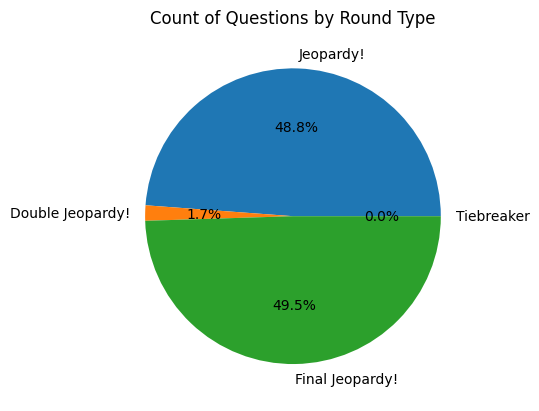

In [127]:
# Composition of the Number of Questions by Round Type 
round_type = ['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!', 'Tiebreaker']
count_by_round = jeopardy_df.groupby(' Round')[' Question'].count()
count_by_round
plt.pie(count_by_round, labels=round_type, autopct='%1.1f%%')
plt.title('Count of Questions by Round Type')

In [169]:
# # Top 5 Categories by Value
# top_categories = ['Before & After', 'Science, Literature', 'American History', 'Potpourri']
# jeopardy_top_categories = jeopardy_df[jeopardy_df[' Category'].isin(top_categories)]
# top_categories_value_count = jeopardy_top_categories.groupby([' Category', ' Value'])
# value1= 
# x_axis = np.arange(len(top_categories))
# plt.bar(x_axis - 0.2, 

round_type = ['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!', 'Tiebreaker']
jeopardy_df[' Value'] = jeopardy_df[' Value'].str.replace('$', '')
drop_value_nulls = jeopardy_df[' Value'].fillna('')
values_multiples_100 = drop_value_nulls[drop_value_nulls.str.endswith('00')]
values_multiples_100.unique()
# filter_jeopardy = jeopardy_df[jeopardy_df[' Round'].isin(round_type)]
# value_grouped = filter_jeopardy.groupby([' Round',' Value']).size().unstack(fill_value=0)
# value_grouped.T.plot(kind='bar', figsize=(10,7), width=0.8)

array(['200', '400', '600', '800', '2,000', '1000', '1200', '1600',
       '2000', '3,200', '5,000', '100', '300', '500', '1,000', '1,500',
       '1,200', '4,800', '1,800', '1,100', '2,200', '3,400', '3,000',
       '4,000', '1,600', '6,800', '1,900', '3,100', '700', '1,400',
       '2,800', '8,000', '6,000', '2,400', '12,000', '3,800', '2,500',
       '6,200', '10,000', '7,000', '7,400', '1,300', '7,200', '2,600',
       '3,300', '5,400', '4,500', '2,100', '900', '3,600', '4,400',
       '3,500', '2,900', '3,900', '4,100', '4,600', '10,800', '2,300',
       '5,600', '8,200', '5,800', '7,500', '1,700', '9,000', '6,100',
       '4,700', '5,200', '4,200', '6,600', '3,700', '5,500', '14,000',
       '2,700', '6,400', '8,600', '6,300', '9,500', '8,800', '10,400',
       '7,600', '6,700', '5,100', '13,200', '4,300', '12,400', '7,800',
       '13,000', '11,600', '14,200', '8,400', '8,700', '11,000', '5,700',
       '18,000', '9,800', '9,200', '8,500', '13,800', '16,400', '11,200'],
      dt

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? I wasn't anticipating the values to include values that are not multiples of $100. I also wasn't anticipating the number of null values in the Value column.
2. Do you have any concerns about your dataset? I may be limited in the type of analyses I can run with the question column considering its extremely varied data.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? Remove $ and commas in values column, possibly create multiple columns to break up the air date into month, day and year OR only include year, create consistency in answer elements (lowercase so that they are not case sensitive), change data types for value and air date column, remove any spaces before and after values in column names and data set.